# Code for Producing Figure 3  

### From the paper:  
**"Fractal clusters and urban scaling shape spatial inequality in U.S. patenting"**, published in npj Complexity,  https://doi.org/10.1038/s44260-025-00054-y

**Authors:**  
Salva Duran-Nebreda, Blai Vidiella,  R. Alexander Bentley and Sergi Valverde

**Date:** September 8, 2025  
**Location:** Barcelona  
**Group:** Evolution of Networks Lab |  https://svalver.github.io  
**E-mail:** svalver@gmail.com

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import seaborn as sns
from scipy.spatial.distance import pdist, euclidean

light_gray = [0.7]*3  # define light gray color RGB
light_gray2 = [0.5]*3  # define light gray color RGB
dark_gray = [0.2]*3  # define light gray color RGB

In [3]:
DATAFOLDER = "../../data/"

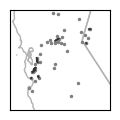

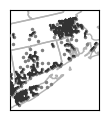

In [5]:
for dataset in ['videogames', 'biotech']:
    #Big picture
    fig, ax = plt.subplots(figsize=(6,4.5))

    # Lambert Conformal map of lower 48 states.
    m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
                projection='lcc',lat_1=33,lat_2=45,lon_0=-95, resolution="l")

    #%% ---------   draw state boundaries  ----------------------------------------
    ## data from U.S Census Bureau
    ## http://www.census.gov/geo/www/cob/st2000.html
    shp_info = m.readshapefile('st99_d00','states', drawbounds=True,
                               linewidth=0.5, color=light_gray)
    # draw country outline (coast+boundaries)
    m.drawcountries(linewidth=0.9, linestyle='solid', color=dark_gray, antialiased=True, ax=ax, zorder=None)
    m.drawcoastlines(linewidth=0.9, linestyle='solid', color=dark_gray, antialiased=True, ax=ax, zorder=None)

    # get patent lat longs and compute patenting intensity
    df = pd.read_csv(DATAFOLDER + 'full_' + dataset + '.csv', encoding="latin-1")

    for i in range(len(df)):
        if df.loc[i, 'country'] == 'USA':
            df.loc[i, 'country'] = 'US'

    city_dict = {}
    df_country = df[df['country'] == 'US']
    df_country.reset_index(drop=True, inplace=True)

    for i in range(len(df_country)):
        city = (df_country.loc[i, 'longitude'], df_country.loc[i, 'latitude'])
        if city not in city_dict:
            city_dict[city] = 1
        else:
            city_dict[city] += 1

    di = {k: v for k, v in sorted(city_dict.items(), key=lambda item: item[1])}
    lats = []
    lons = []
    intensity = []
    sizes = []
    for city in di:
        lons.append(city[0])
        lats.append(city[1])
        intensity.append(np.log10(city_dict[city]))
        sizes.append(20*np.log10(city_dict[city]))
    m.scatter(lons, lats, c=intensity, s=sizes, cmap=sns.color_palette("flare", as_cmap=True), latlon=True, zorder=3)

    plt.title(dataset)
    plt.colorbar()
    plt.savefig(dataset + '.pdf')
    plt.savefig(dataset + '.png')
    plt.close()

    #Zoom
    fig, ax = plt.subplots(figsize=(1.3,1.3))
    if dataset == 'biotech':
        # Lambert Conformal map of lower 48 states.
        m = Basemap(llcrnrlon=-74,llcrnrlat=40.5,urcrnrlon=-70,urcrnrlat=42.5,
                projection='lcc',lat_1=33,lat_2=45,lon_0=-95, resolution="l")
        lon_bounds = [-74,-70]
        lat_bounds = [40.5, 42.5]
    else:
        m = Basemap(llcrnrlon=-122.5,llcrnrlat=35.5,urcrnrlon=-119,urcrnrlat=40.5,
                projection='lcc',lat_1=33,lat_2=45,lon_0=-95, resolution="l")
        lon_bounds = [-122,-119.5]
        lat_bounds = [35.5, 40.5]

    #%% ---------   draw state boundaries  ----------------------------------------
    shp_info = m.readshapefile('st99_d00','states', drawbounds=True,
                               linewidth=1, color=light_gray)

    # get patent lat longs and compute patenting intensity
    df = pd.read_csv(DATAFOLDER + 'full_' + dataset + '.csv', encoding="latin-1")
    for i in range(len(df)):
        if df.loc[i, 'country'] == 'USA':
            df.loc[i, 'country'] = 'US'

    cities = []
    df_country = df[df['country'] == 'US']
    df_country.reset_index(drop=True, inplace=True)

    for i in range(len(df_country)):
        city = (df_country.loc[i, 'longitude'], df_country.loc[i, 'latitude'])
        if city not in cities:
            if city[0] > lon_bounds[0] and city[0] < lon_bounds[1]:
                if city[1] > lat_bounds[0] and city[1] < lat_bounds[1]:
                    cities.append(city)

    lats = []
    lons = []
    for city in cities:
        lons.append(city[0])
        lats.append(city[1])

    m.scatter(lons, lats, color=light_gray2, s=2.2, latlon=True, zorder=3)

    dcrit = 0.1
    for i, a in enumerate(cities):
        for j, b in enumerate(cities):
            if i != j and euclidean(a, b) <= dcrit:
                m.plot([a[0],b[0]], [a[1],b[1]], '-', color=dark_gray, latlon=True, zorder=4, linewidth=1)


    #plt.title(dataset+' zoom')
    plt.savefig(dataset+' color zoom' + str(dcrit) + '.pdf')
    plt.savefig(dataset+' color zoom' + str(dcrit) + '.png', dpi=600)